# Analyze and exploit web data

In [1]:
# import library
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load file data

In [2]:
file_path = "../data"
file_name = "bbcnews_posts_2012_v3.json"

In [3]:
file_data = open( file_path + "/" + file_name, "r")
# print (file_data.read())
# print (type(file_data))

## Covert to json object

In [4]:
# load data to json
json_data = json.load(file_data)

In [5]:
print type(json_data)
print json_data

<type 'list'>
[{u'reactions': 239, u'from_name': u'BBC News', u'love': 0, u'like': 239, u'created_time_second': 21, u'type': u'photo', u'angry': 0, u'haha': 0, u'wow': 0, u'comments': 6, u'sad': 0, u'created_time_hour': 18, u'created_time_minute': 21, u'shares': 45, u'created_time_year': 2012, u'link': u'https://www.facebook.com/bbcnews/photos/a.10150883570262217.403741.228735667216/10151160265662217/?type=3', u'created_time_month': 12, u'message': u'Your best photographs of 2012. GALLERY: http://bbc.in/UvZxmS', u'created_time_day': 30, u'statusType': u'added_photos', u'id': u'228735667216_10151160756802217'}, {u'reactions': 1153, u'from_name': u'BBC News', u'love': 0, u'like': 1153, u'created_time_second': 1, u'type': u'photo', u'angry': 0, u'haha': 0, u'wow': 0, u'comments': 220, u'sad': 0, u'created_time_hour': 19, u'created_time_minute': 5, u'shares': 399, u'created_time_year': 2012, u'link': u'https://www.facebook.com/bbcnews/photos/a.10150883570262217.403741.228735667216/10151159

## Woking with pandas

In [6]:
# import data from json to data frame
df = pd.DataFrame(json_data)

In [7]:
# show data 
print df.shape 
col = ['id','reactions','shares','comments']
print df[col].head(50)

(315, 21)
                                id  reactions  shares  comments
0   228735667216_10151160756802217        239      45         6
1   228735667216_10151159518262217       1153     399       220
2   228735667216_10151158041992217       1153     399       220
3   228735667216_10151151829617217        402     109        53
4   228735667216_10151147826632217        243      76        39
5   228735667216_10151145998117217        323      88        36
6   228735667216_10151145322672217       1153     399       220
7   228735667216_10151143864257217        107      41        31
8   228735667216_10151143480202217        161      35        52
9     228735667216_423180907749042        173      24       184
10  228735667216_10151142485512217        105      31        85
11  228735667216_10151141691202217        225      79        35
12  228735667216_10151140824217217        294      92        93
13  228735667216_10151140567527217        228      92       132
14  228735667216_1015113993012

In [8]:
# type columns
print (df.dtypes)

angry                   int64
comments                int64
created_time_day        int64
created_time_hour       int64
created_time_minute     int64
created_time_month      int64
created_time_second     int64
created_time_year       int64
from_name              object
haha                    int64
id                     object
like                    int64
link                   object
love                    int64
message                object
reactions               int64
sad                     int64
shares                  int64
statusType             object
type                   object
wow                     int64
dtype: object


## Cleaning data

In [9]:
# insert created_time from day, month, year
df['created_time'] = df.created_time_day.map(str) + "/" + df.created_time_month.map(str) + "/" + df.created_time_year.map(str)
col.append('created_time')
print df[col].head()

                               id  reactions  shares  comments created_time
0  228735667216_10151160756802217        239      45         6   30/12/2012
1  228735667216_10151159518262217       1153     399       220   29/12/2012
2  228735667216_10151158041992217       1153     399       220   28/12/2012
3  228735667216_10151151829617217        402     109        53   24/12/2012
4  228735667216_10151147826632217        243      76        39   21/12/2012


AxesSubplot(0.125,0.125;0.775x0.755)


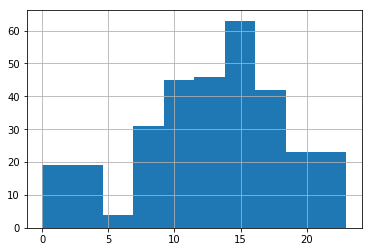

In [10]:
# Histogram shares
print df.created_time_hour.hist()

AxesSubplot(0.125,0.125;0.775x0.755)


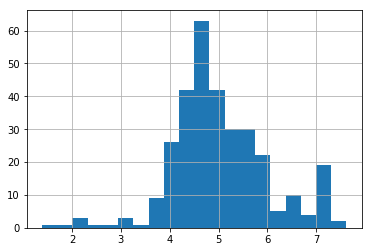

In [11]:
df['reactions_log'] = np.log(df.reactions)
print df.reactions_log.hist(bins = 20)

Text(0,0.5,u'Number of shares')

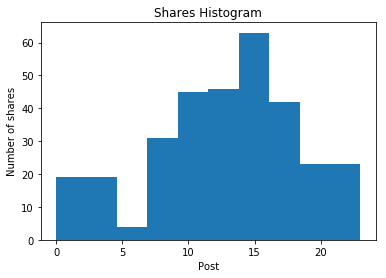

In [12]:
#data = [1,3,3,4,5,6,7,8,9]
plt.hist(df.created_time_hour)
plt.title("Shares Histogram")
plt.xlabel("Post")
plt.ylabel("Number of shares")

In [13]:
data = df.created_time_hour.value_counts()
print type(data)

<class 'pandas.core.series.Series'>


In [14]:
print data

16    32
17    25
10    24
12    24
13    22
11    21
18    17
8     16
14    16
15    15
4     12
20    12
9     12
19    11
22     8
21     8
2      8
3      7
23     7
0      7
1      4
5      3
7      3
6      1
Name: created_time_hour, dtype: int64


In [15]:
data_sort = data.sort_index()

In [16]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

angry                  0
comments               0
created_time_day       0
created_time_hour      0
created_time_minute    0
created_time_month     0
created_time_second    0
created_time_year      0
from_name              0
haha                   0
id                     0
like                   0
link                   0
love                   0
message                0
reactions              0
sad                    0
shares                 0
statusType             0
type                   0
wow                    0
created_time           0
reactions_log          0
dtype: int64

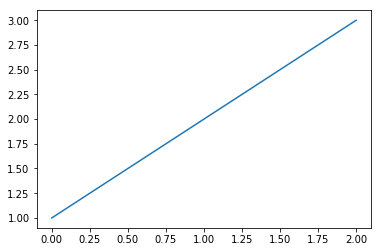

In [17]:
plt.plot([1,2,3])
plt.show()

## Working with created time

In [18]:
data = df.created_time_month.value_counts()
print data

1     70
10    45
7     40
11    32
12    30
2     25
9     21
8     21
6     15
5      8
3      7
4      1
Name: created_time_month, dtype: int64


In [19]:
data_sort = data.sort_index()
print data_sort.values


[70 25  7  1  8 15 40 21 21 45 32 30]


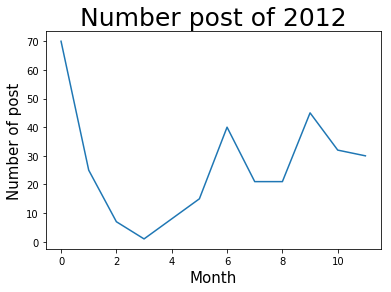

In [20]:
plt.plot(data_sort.values)
plt.title("Number post of 2012", fontsize=25)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of post', fontsize=15)
plt.show()

In [21]:
df = df[::-1]
print df[col]


                                 id  reactions  shares  comments created_time
314    228735667216_216778578403581        366     140        59     1/1/2012
313    228735667216_265944193468433        190      29       172     1/1/2012
312    228735667216_293494434036671         92      20       143     2/1/2012
311    228735667216_258364327563686        173      52        72     2/1/2012
310    228735667216_211206238967365         97      18        88     3/1/2012
309    228735667216_143997919046058        347      52       277     3/1/2012
308    228735667216_299118413457433         83      18        92     3/1/2012
307    228735667216_123570507761844        118      29        34     5/1/2012
306    228735667216_304980246210634        122      26      1457     5/1/2012
305    228735667216_170985276336877        173      41        43     6/1/2012
304    228735667216_352412788117661        118     131       153     6/1/2012
303    228735667216_212903362131332        337      55       134

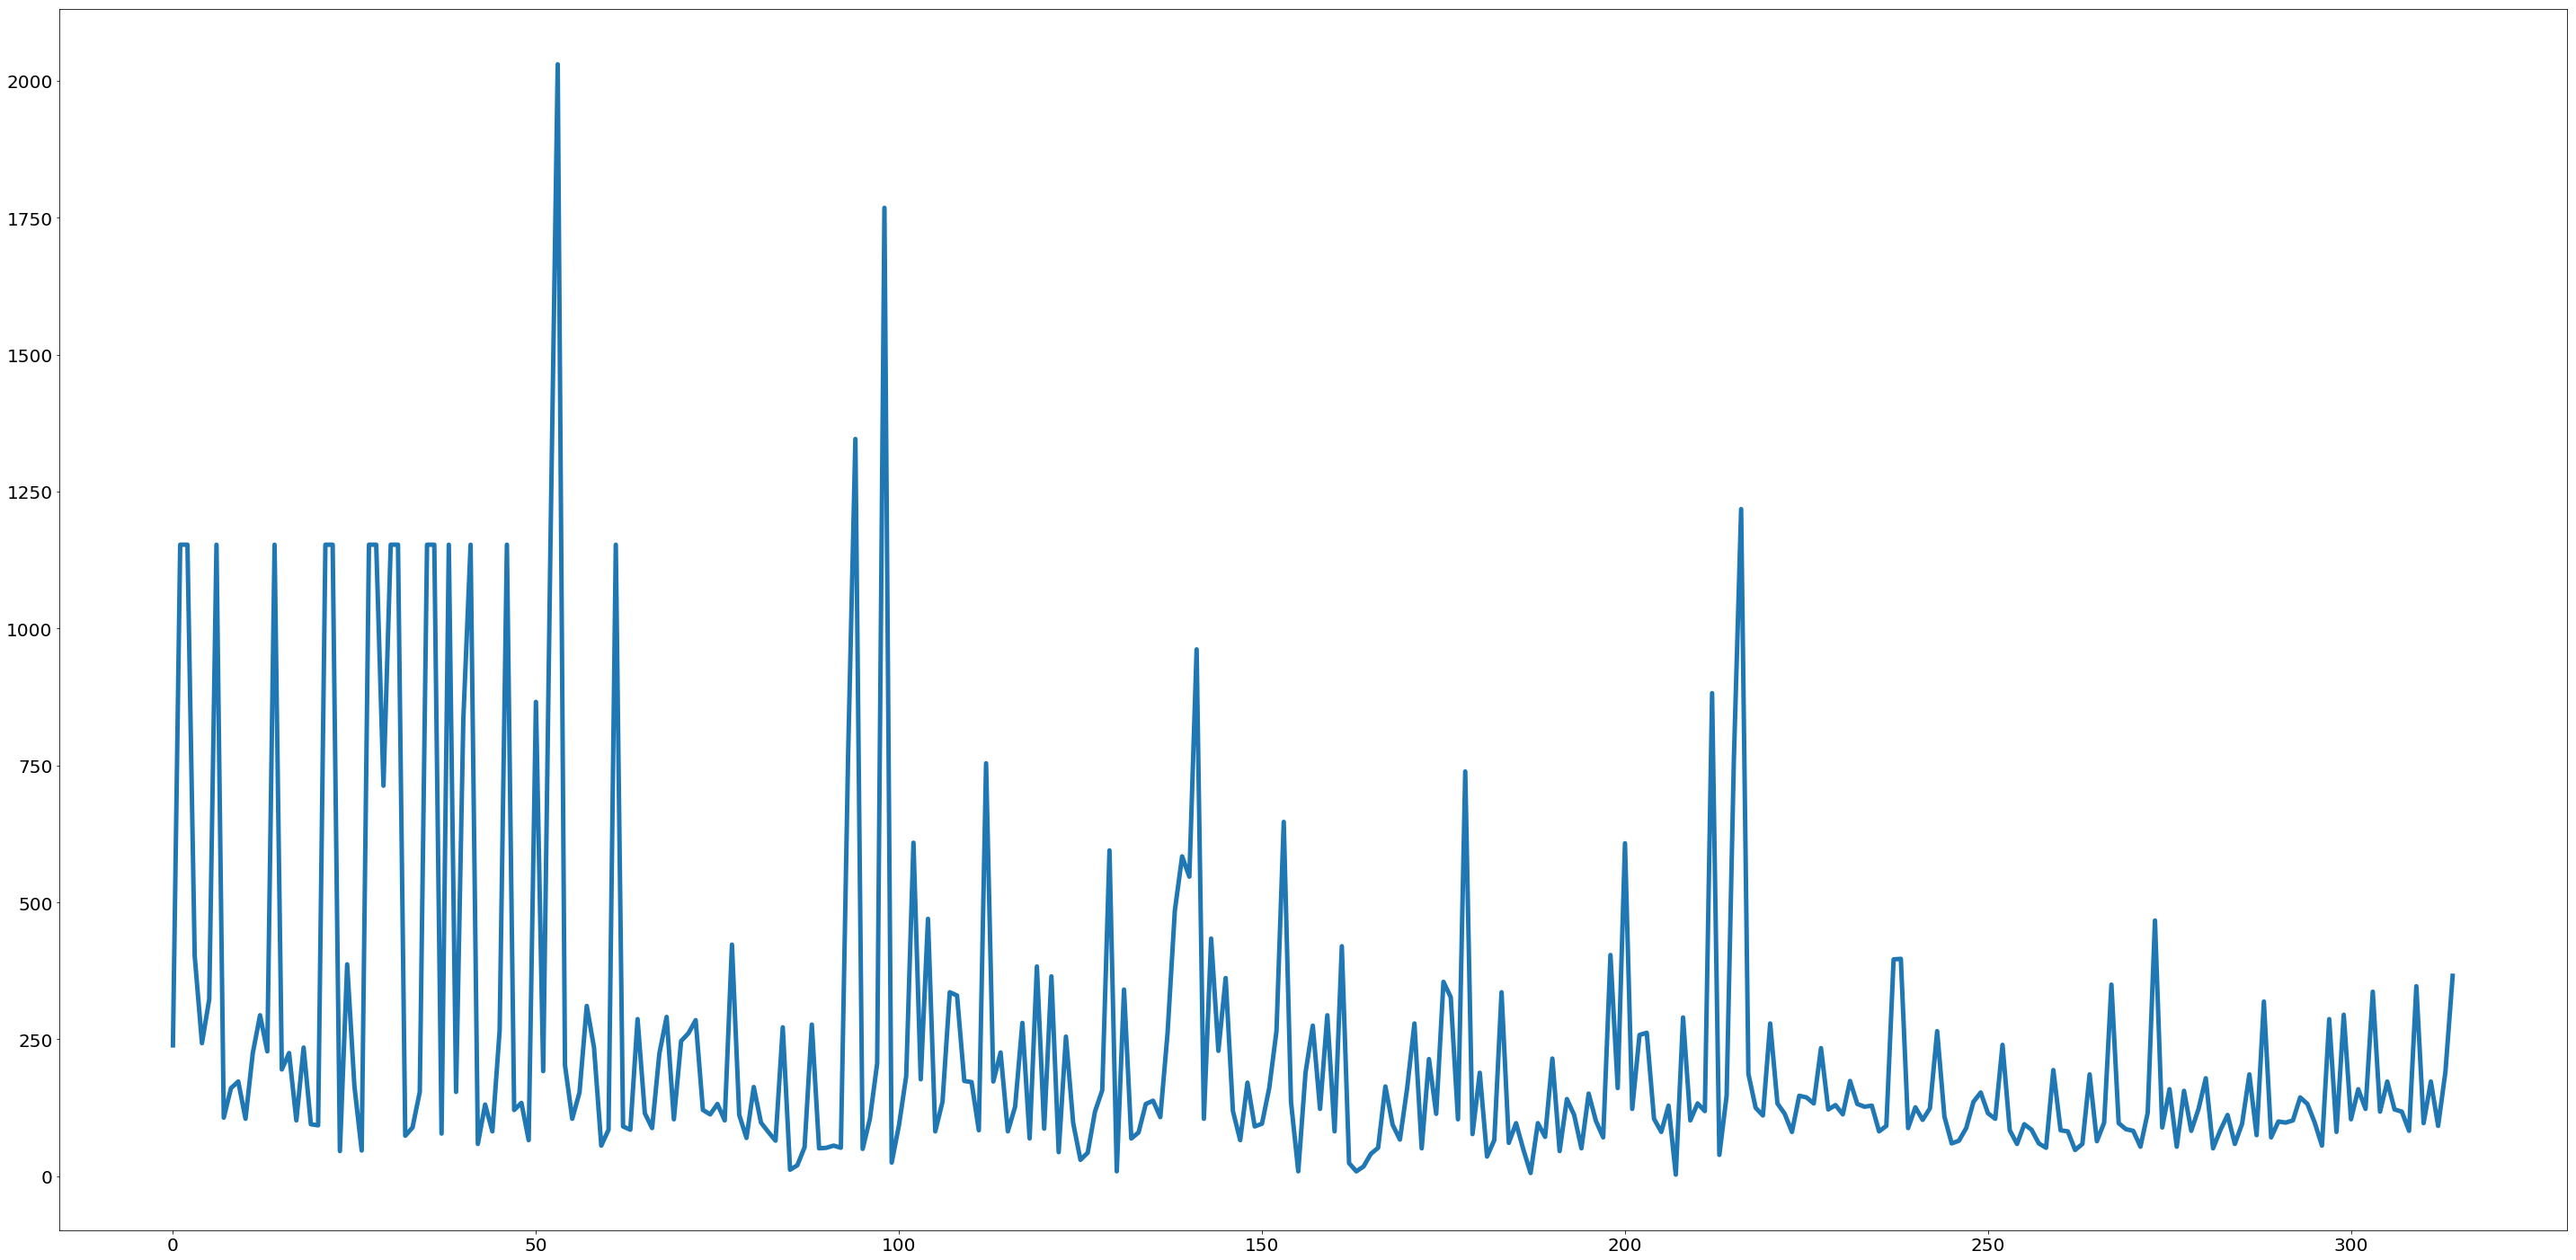

In [22]:
df.like.plot(figsize=(50,25), linewidth=5, fontsize=20)

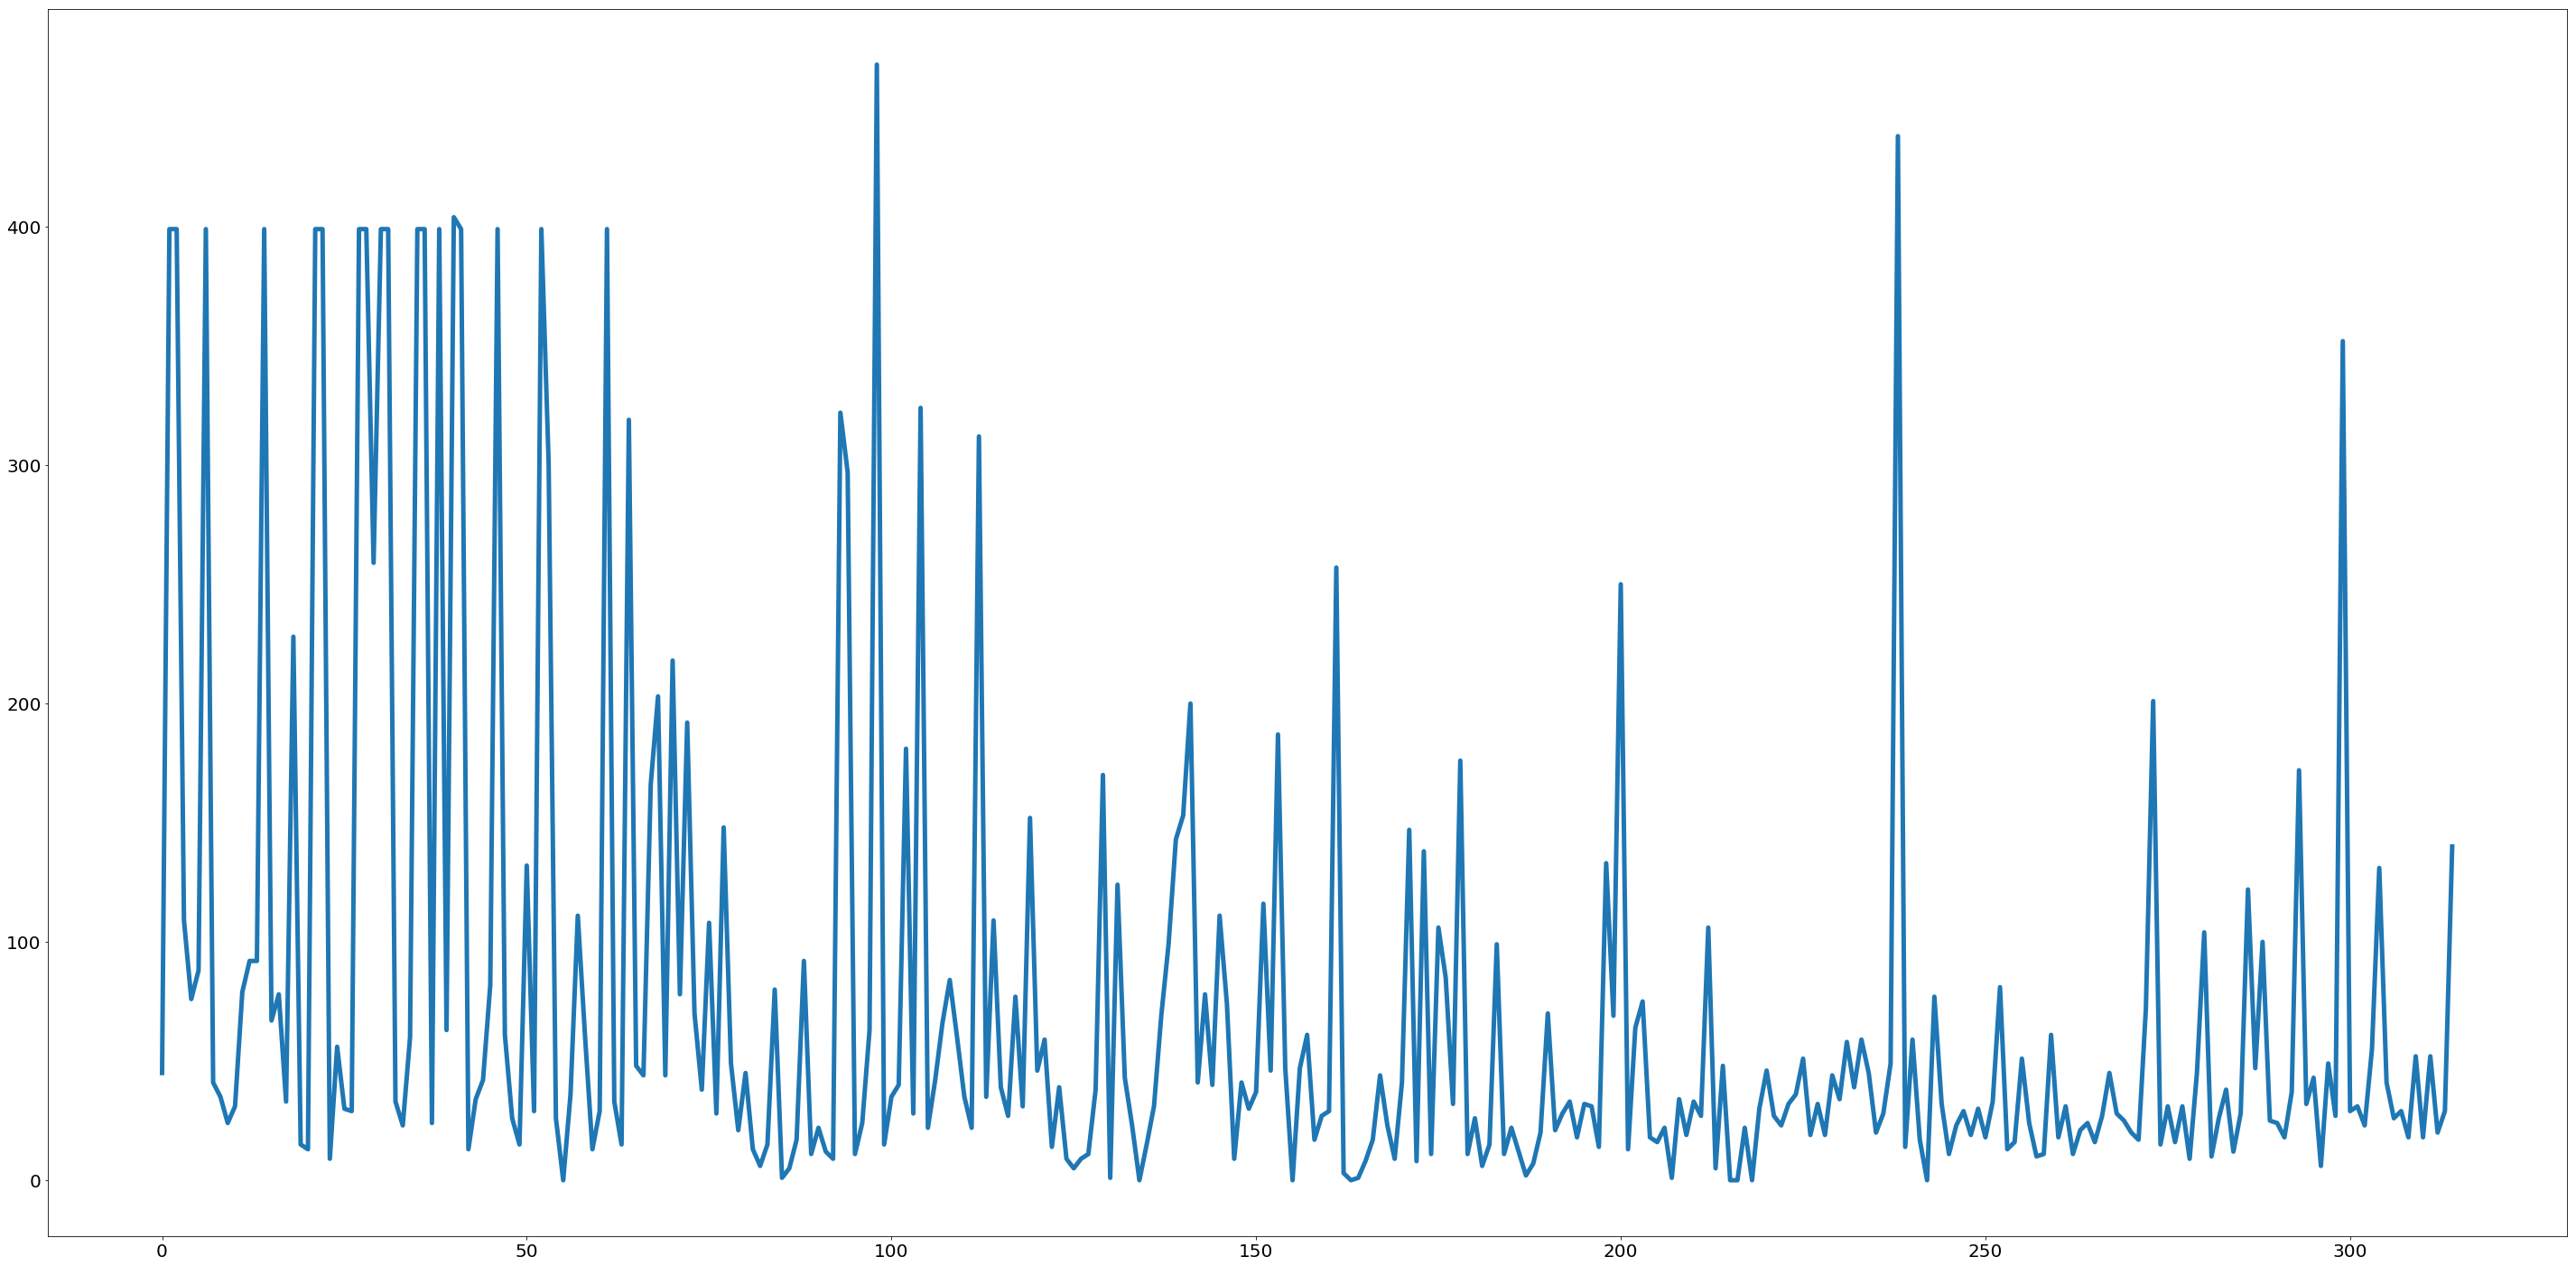

In [23]:
df.shares.plot(figsize=(50,25), linewidth=5, fontsize=20)

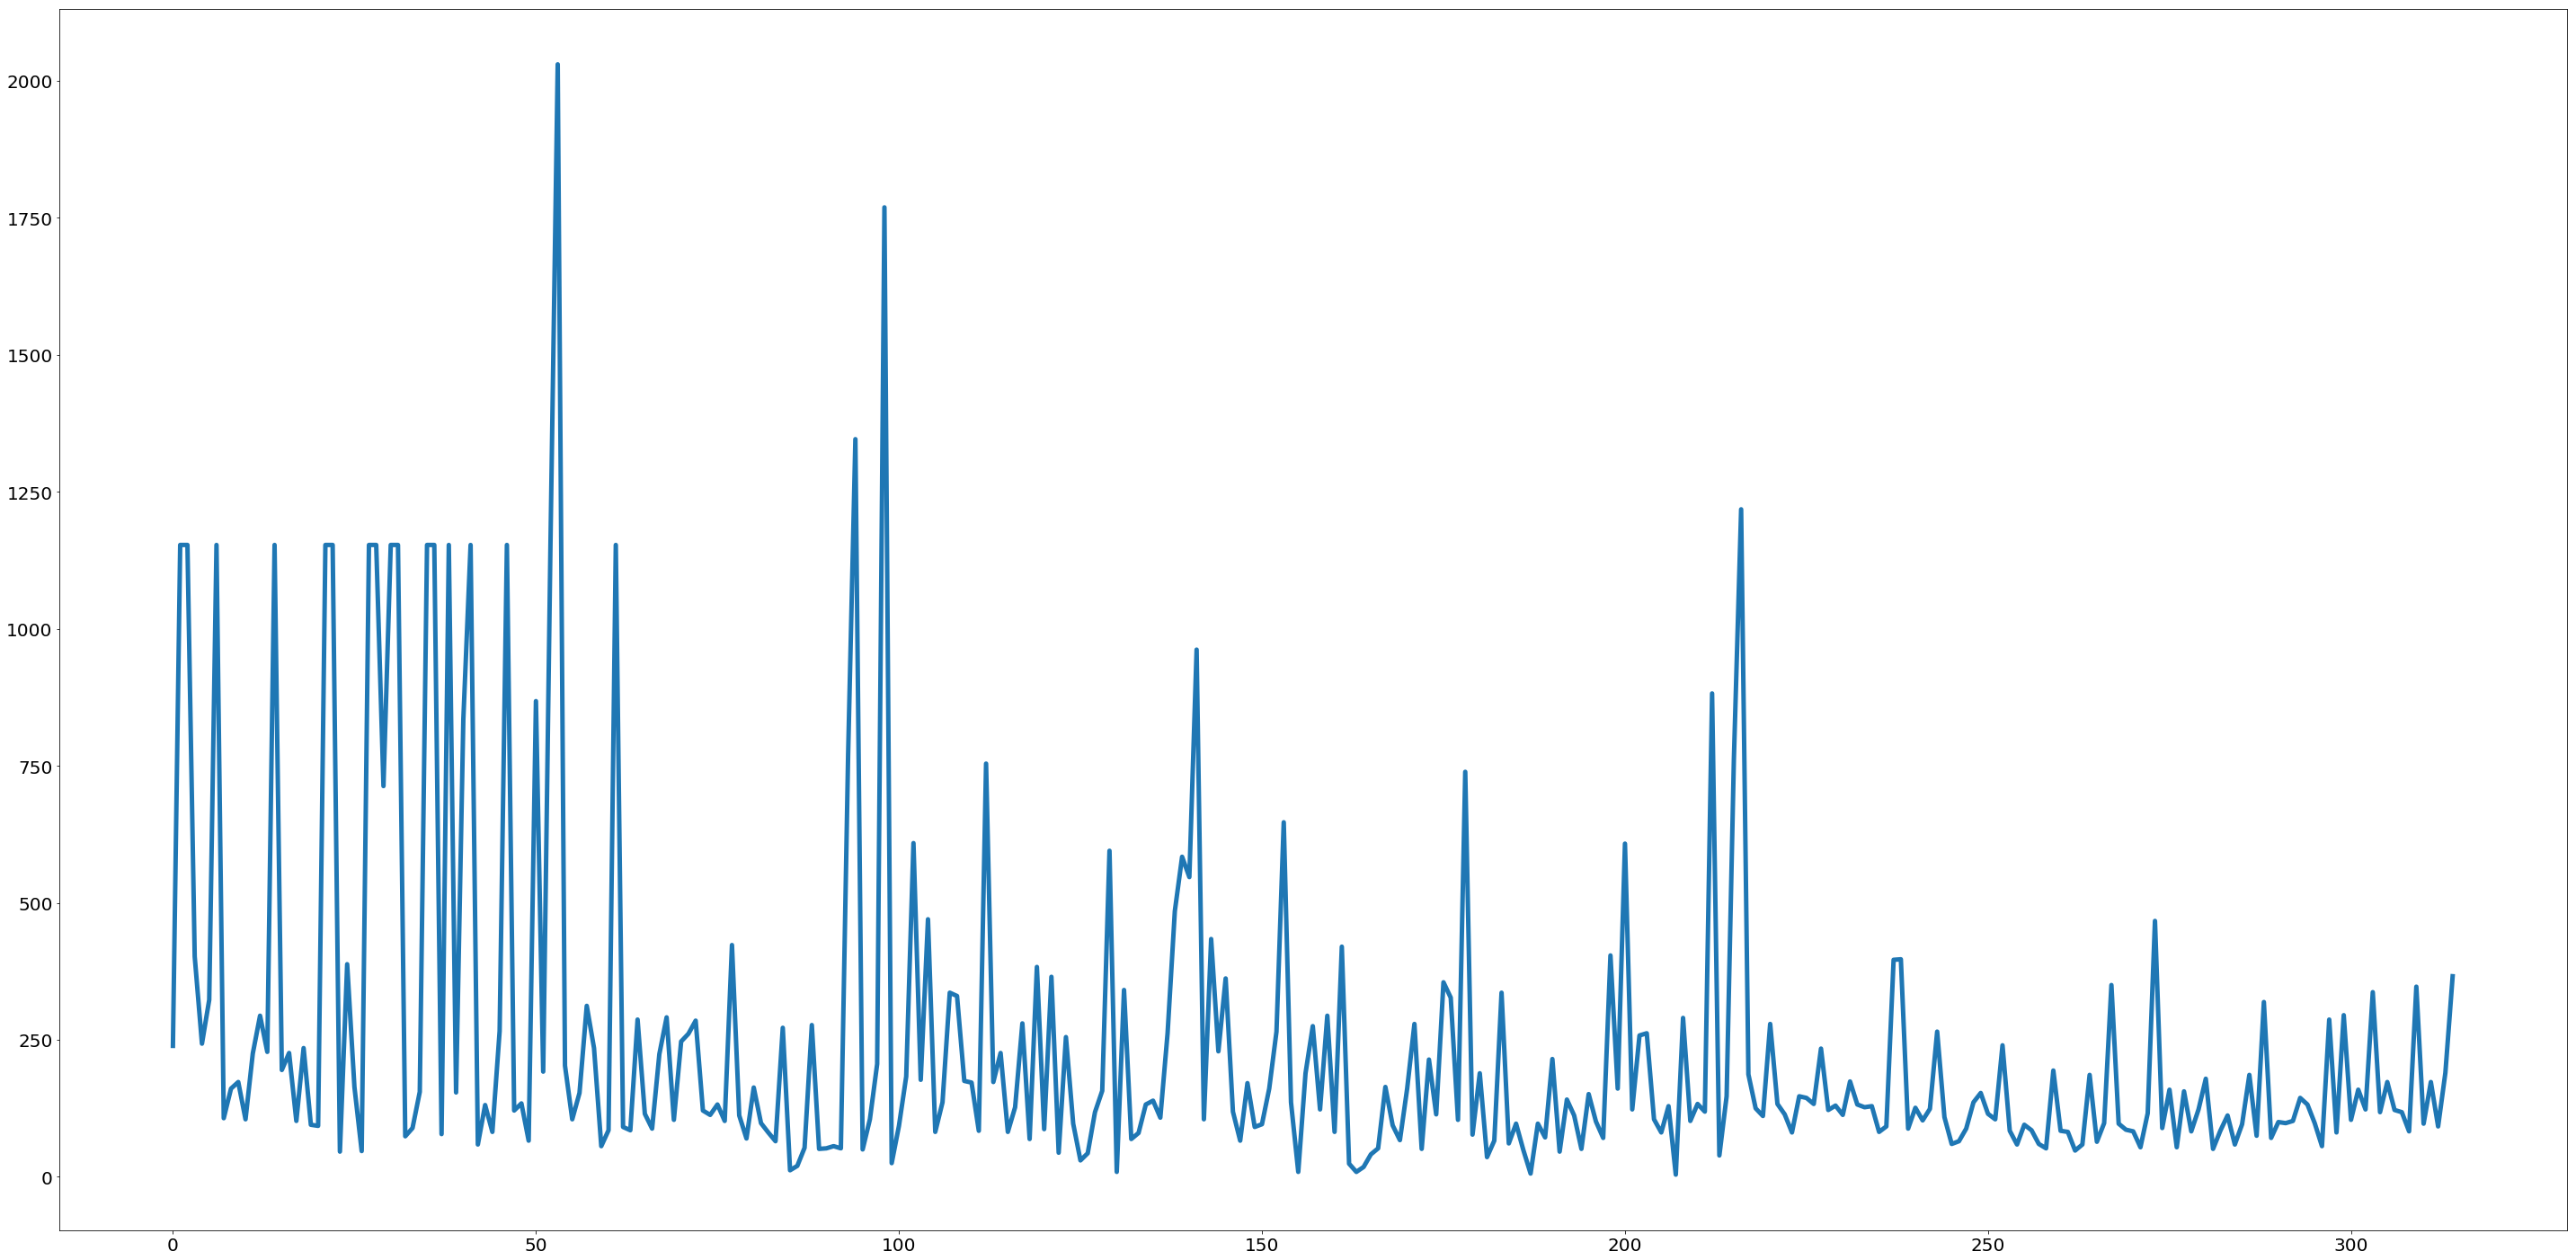

In [24]:
df.reactions.plot(figsize=(50,25), linewidth=5, fontsize=20)

In [25]:
print df[col].head()

                               id  reactions  shares  comments created_time
314  228735667216_216778578403581        366     140        59     1/1/2012
313  228735667216_265944193468433        190      29       172     1/1/2012
312  228735667216_293494434036671         92      20       143     2/1/2012
311  228735667216_258364327563686        173      52        72     2/1/2012
310  228735667216_211206238967365         97      18        88     3/1/2012


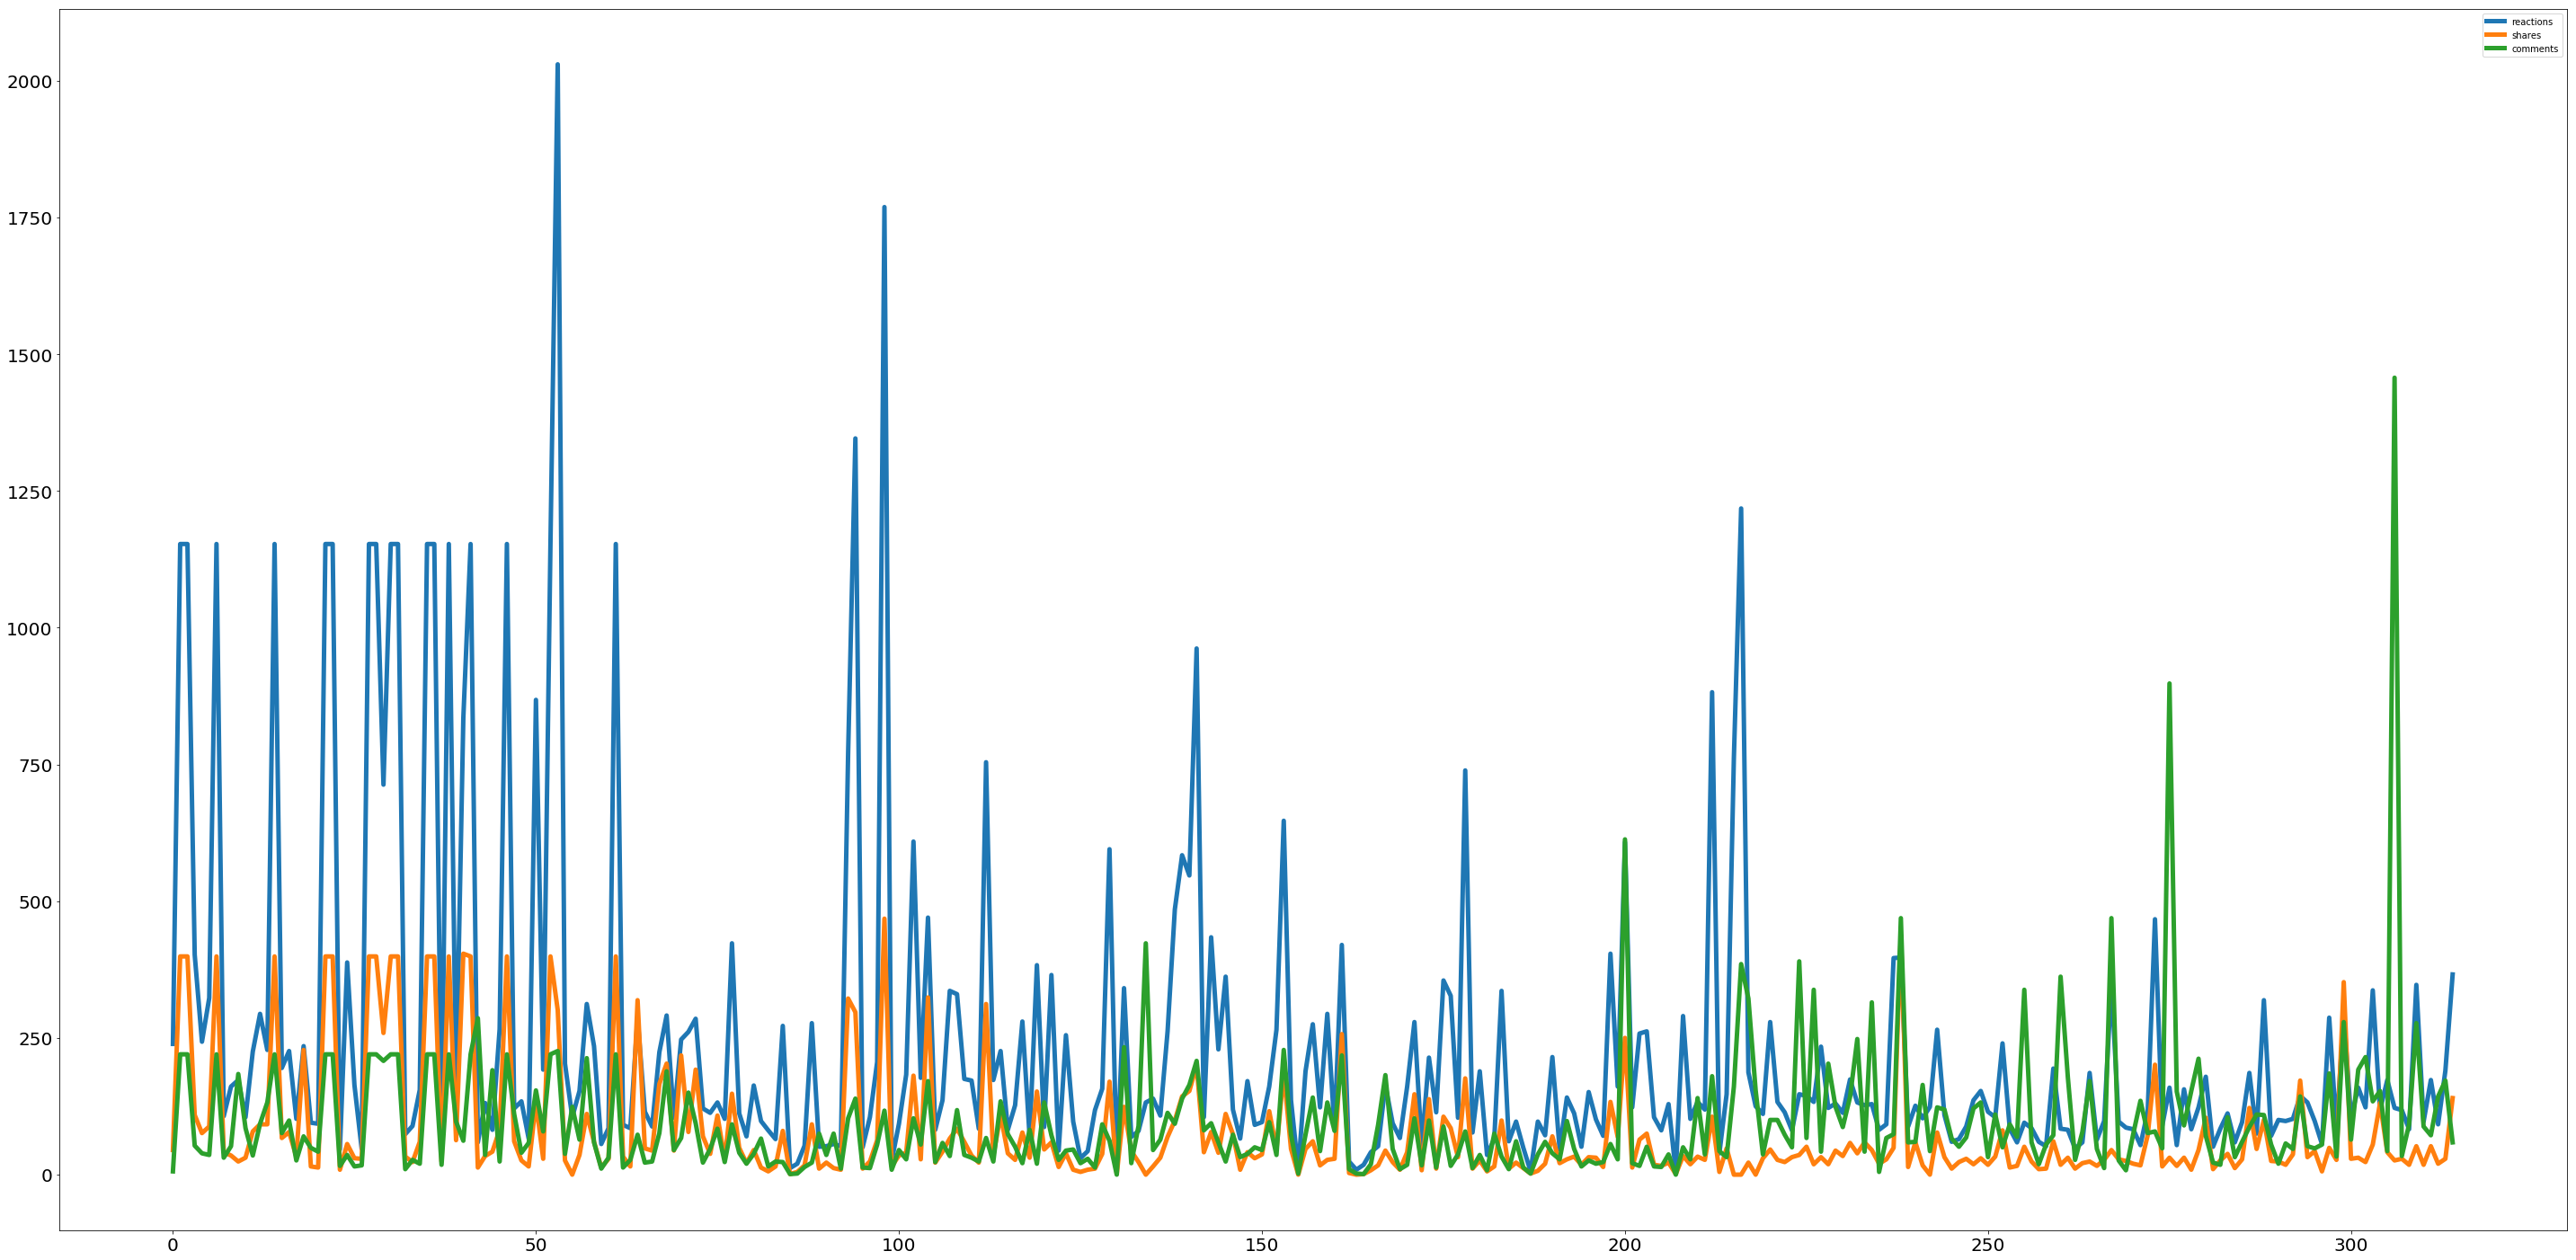

In [26]:
df[col].plot(figsize=(50,25), linewidth=5, fontsize=20)

In [ ]:
plt.plot(names['created_time'], names['reactions'])
#plt.plot(names['year'][::4], names['F'][::4],'-o', alpha=0.5)
show()